In [59]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [109]:
# Read in subset_three_targets.csv
df = pd.read_csv('data/subset_three_targets.csv')

In [61]:
df.columns

Index(['CATAG3', 'HEALTH2', 'ANYHLTI2', 'INCOME', 'POVERTY3', 'TOBFLAG',
       'MRJFLAG', 'PYUD5MRJ', 'MJYRTOT', 'ALCFLAG', 'COCFLAG', 'CRKFLAG',
       'HERFLAG', 'LSDFLAG', 'METHAMFLAG', 'ADSMMDEA', 'YODSMMDE', 'DEP'],
      dtype='object')

### Question I: What are the substance use variables in this dataset?

### Answer: 'TOBFLAG', 'MRJFLAG', 'PYUD5MRJ', 'MJYRTOT', 'ALCFLAG', 'COCFLAG', 'CRKFLAG', 'HERFLAG', 'LSDFLAG', 'METHAMFLAG'

### Question II: Calculate the proportion of the survey respondents who have done each of the drugs covered in this analysis.

In [62]:
# Loop through columns and keep only those with 'FLAG' in the name

flag_cols = []

for col in df.columns:
    if 'FLAG' in col:
        flag_cols.append(col)

In [63]:
# Print flag_cols
flag_cols

['TOBFLAG',
 'MRJFLAG',
 'ALCFLAG',
 'COCFLAG',
 'CRKFLAG',
 'HERFLAG',
 'LSDFLAG',
 'METHAMFLAG']

In [64]:
# For every column in flag_cols, calculate the proportion of the entire sample population that has a 1 in that column
# The sample population size is equal to len(df)

# First, subset the dataframe to only include the flag_cols

# Subset dataframe
flag_df = df[flag_cols]

# Inspect
flag_df

,TOBFLAG,MRJFLAG,ALCFLAG,COCFLAG,CRKFLAG,HERFLAG,LSDFLAG,METHAMFLAG
0,1,1,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,1,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
53891,0,0,0,0,0,0,0,0
53892,0,1,1,0,0,0,0,0
53893,1,1,1,0,0,0,0,0
53894,1,1,1,0,0,0,0,0


In [65]:
# Loop through the flag_cols over the flag_df and create a dictionary of the sums of each flag

# Create empty dictionary for flag sums
flag_sums = {}
# Loop through flag_cols over dataframe
for col in flag_cols:
    # Create a new column for each flag column
    flag_sums[col] = flag_df[col].sum()
# Print the dictionary
flag_sums

{'TOBFLAG': 26072,
 'MRJFLAG': 23330,
 'ALCFLAG': 38598,
 'COCFLAG': 6212,
 'CRKFLAG': 1417,
 'HERFLAG': 1013,
 'LSDFLAG': 4966,
 'METHAMFLAG': 2388}

In [66]:
# Convert dict to dataframe
flag_sum_df = pd.DataFrame(flag_sums.items(), columns=['substance', 'sum'])

# Sort df in descending order
flag_sum_df = flag_sum_df.sort_values(by='sum', ascending=False)

# Inspect
flag_sum_df

,substance,sum
2,ALCFLAG,38598
0,TOBFLAG,26072
1,MRJFLAG,23330
3,COCFLAG,6212
6,LSDFLAG,4966
7,METHAMFLAG,2388
4,CRKFLAG,1417
5,HERFLAG,1013


In [67]:
# Calculate the percentage of the total sample population that has a flag for each substance

# Define N_rows
N_rows = len(df)

# Create calculated variable
flag_sum_df['percentage'] = round(flag_sum_df['sum'] / N_rows, 2)*100

# Inspect
flag_sum_df

,substance,sum,percentage
2,ALCFLAG,38598,72.0
0,TOBFLAG,26072,48.0
1,MRJFLAG,23330,43.0
3,COCFLAG,6212,12.0
6,LSDFLAG,4966,9.0
7,METHAMFLAG,2388,4.0
4,CRKFLAG,1417,3.0
5,HERFLAG,1013,2.0


Text(0.5, 1.0, 'Percentage of Sample Population by Substance "Ever"')

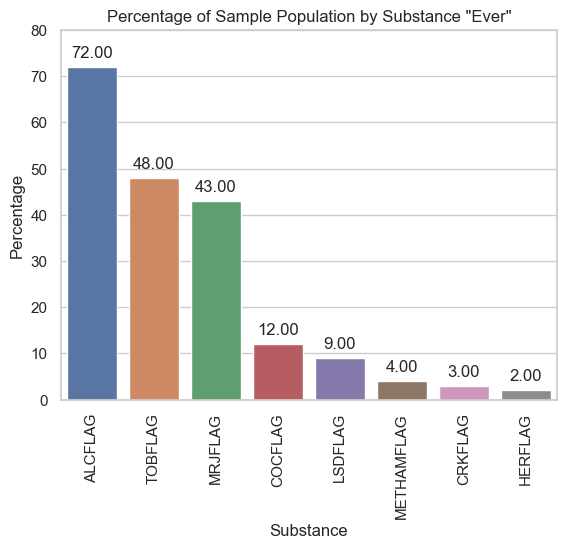

In [68]:
# Plot flag_sum_df with seaborn barplot

barplot = sns.barplot(x='substance', y='percentage', data=flag_sum_df)

# Set the y-axis range to 0-80
barplot.set_ylim(0, 80)

# Rotatate the x-axis labels to 90 degrees
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90)

# Set x-axis label to capitalized 'Substance'
barplot.set_xlabel('Substance')

# Set y-axis label to capitalized 'Percentage'
barplot.set_ylabel('Percentage')

# Annotate the values on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Set title and font size
plt.title('Percentage of Sample Population by Substance "Ever"', fontsize=12)

### Interlude: Chi Square Test: Depression between MJ Users and Non-MJ Users

<Axes: ylabel='Frequency'>

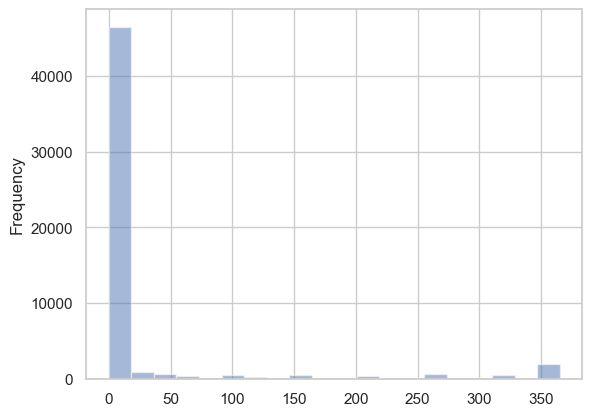

In [69]:
# Use Days in a Year (MJ) and bin it(?) 

mjDays = df.MJYRTOT

mjDays.plot.hist(bins=20, alpha=0.5)

<Axes: >

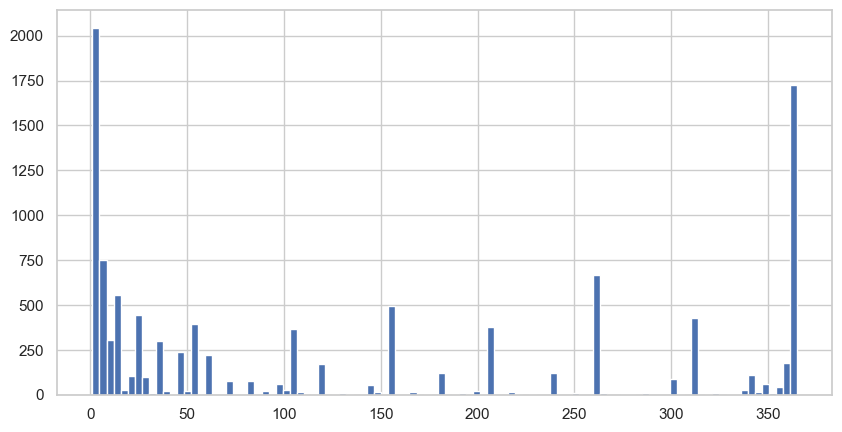

In [70]:
nonZeroMJDays = mjDays[mjDays > 0]

nonZeroMJDays.hist(bins=100, figsize=(10, 5))

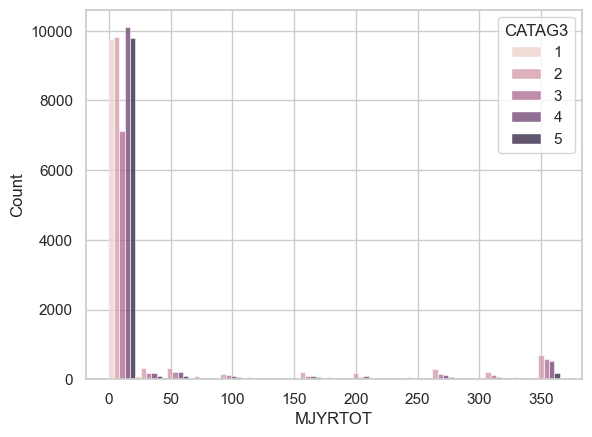

In [71]:
# Use seaborn to make a more visually appealing histogram

# Your code to create the stacked histogram
sns.set(style="whitegrid")  # Set the style
g = sns.histplot(data=df, x="MJYRTOT", hue="CATAG3", multiple="dodge")

# Change the y-axis scale to logarithmic
#plt.yscale("log")

# Show the plot
plt.show()

In [72]:
moreThanOne = df[df["MJYRTOT"] > 1]

In [73]:
# q: How do I change the figure size for a seaborn plot?
# a: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

In [74]:
# Create new column with: '12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35-49 Years Old', '50 or Older'
# Corresponding with CATAG3's values [1,5]

def age_group(age):
    if age == 1:
        return '12-17 Years Old'
    elif age == 2:
        return '18-25 Years Old'
    elif age == 3:
        return '26-34 Years Old'
    elif age == 4:
        return '35-49 Years Old'
    elif age == 5:
        return '50 or Older'
    else:
        return 'Unknown'
df["age_group"] = df["CATAG3"].apply(age_group)

In [75]:
df.age_group.value_counts() 

18-25 Years Old    12654
35-49 Years Old    11678
50 or Older        10478
12-17 Years Old    10241
26-34 Years Old     8845
Name: age_group, dtype: int64

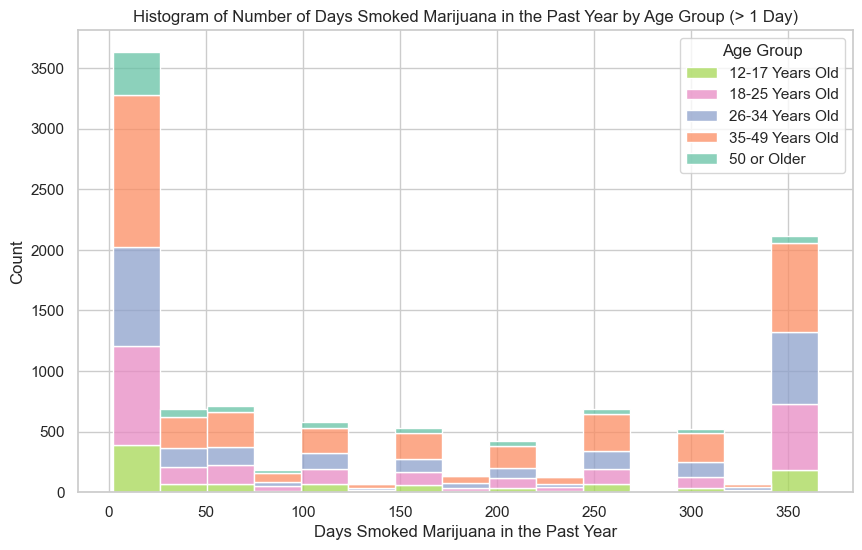

In [76]:
from matplotlib import pyplot

# Your code to create the stacked histogram
sns.set(style="whitegrid")  # Set the style

fig, ax = pyplot.subplots(figsize=(10,6))
sns.histplot(data=moreThanOne, x="MJYRTOT", hue="CATAG3", multiple="stack", palette="Set2")

# Set the legend labels manually
# '12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35-49 Years Old', '50 or Older'
ax.legend(title="Age Group", labels=['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35-49 Years Old', '50 or Older'])

# Set title
ax.set_title("Histogram of Number of Days Smoked Marijuana in the Past Year by Age Group (> 1 Day)")

# Set the x-axis label
ax.set_xlabel("Days Smoked Marijuana in the Past Year")

# Show the plot
plt.show()

In [77]:
# Calcualte the percentage of people who are "smokers"

round(len(moreThanOne)/len(df), 2)*100

19.0

In [78]:
nonZeroMJDays.describe()

count    11100.000000
mean       139.846306
std        141.828021
min          1.000000
25%          8.000000
50%         72.000000
75%        260.000000
max        365.000000
Name: MJYRTOT, dtype: float64

In [79]:
nonZeroMJDays.median()

72.0

In [110]:
# Use >= 100 as the cutoff value
cutoff = 100

# Create a new column called 'SMOKER' (0/1) where individuals with MJYRTOT values of 100 or more get a 1

df['SMOKER'] = np.where(df['MJYRTOT'] >= cutoff, 1, 0)

In [111]:
df.SMOKER.value_counts()

0    48605
1     5291
Name: SMOKER, dtype: int64

In [117]:
import numpy as np
from scipy.stats import chi2_contingency

# Observed contingency table
observed = np.array([[39183, 9422],
                     [3588, 1703]])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 476.60994645729784
P-value: 1.1679308835934149e-105
Degrees of freedom: 1
Expected frequencies:
[[38572.14737643 10032.85262357]
 [ 4198.85262357  1092.14737643]]


In [116]:
9422/48605 # Percent on Non-Smokers with Depression

0.19384836950930975

In [115]:
1703/5291 # Percent of Smokers with Depression

0.32186732186732187

### Question III: What percentage of the total population have done no drugs? (Part 2: Adults?, Part 3: Youth?)

In [84]:
# Filter the df such that all flag_cols values are 0
substance_free = df[df[flag_cols].sum(axis=1) == 0]

# Inspect
len(substance_free)

13643

In [85]:
# Discover the age distribution of substance_free individuals

# Group substance_free by CATAG3
substance_free_age_gb = substance_free.groupby('CATAG3', as_index=False).count()['HEALTH2']

# Inspect
substance_free_age_gb

0    7566
1    2790
2     891
3    1215
4    1181
Name: HEALTH2, dtype: int64

In [86]:
# Now group the original df by CATAG3

# CATAG3 GB
df_age_gb = df.groupby('CATAG3', as_index=False).count()['HEALTH2']

# Inspect
df_age_gb

0    10241
1    12654
2     8845
3    11678
4    10478
Name: HEALTH2, dtype: int64

In [87]:
# Calculate the percentage of each age group that is substance free

sub_free_percent = round(substance_free_age_gb/df_age_gb, 2)*100

sub_free_percent


0    74.0
1    22.0
2    10.0
3    10.0
4    11.0
Name: HEALTH2, dtype: float64

In [88]:
# Create dataframe using sub_free_percent

sub_free_percent_df = pd.DataFrame(sub_free_percent)

# Inspect
sub_free_percent_df

,HEALTH2
0,74.0
1,22.0
2,10.0
3,10.0
4,11.0


In [89]:
# Rename the only column in the dataframe to be 'percentage'
sub_free_percent_df = sub_free_percent_df.rename(columns={'HEALTH2': 'percentage'})


# Insert column called 'age_group' to the left of 'percentage' with these groups:
# 1 = 12-17 Years Old............................................................................................................ 10743 18.51
# 2 = 18-25 Years Old............................................................................................................ 13979 24.09
# 3 = 26-34 Years Old............................................................................................................ 9588 16.52
# 4 = 35-49 Years Old............................................................................................................ 12561 21.64
# 5 = 50 or Older.................................................................................................................... 11163 19.24

sub_free_percent_df.insert(0, 'age_group', ['12-17 Years Old', '18-25 Years Old', '26-34 Years Old', '35-49 Years Old', '50 or Older'])

# Inspect
sub_free_percent_df

,age_group,percentage
0,12-17 Years Old,74.0
1,18-25 Years Old,22.0
2,26-34 Years Old,10.0
3,35-49 Years Old,10.0
4,50 or Older,11.0


Text(0.5, 1.0, 'Percentage of Lifetime Substance-Free Individuals by Age Group')

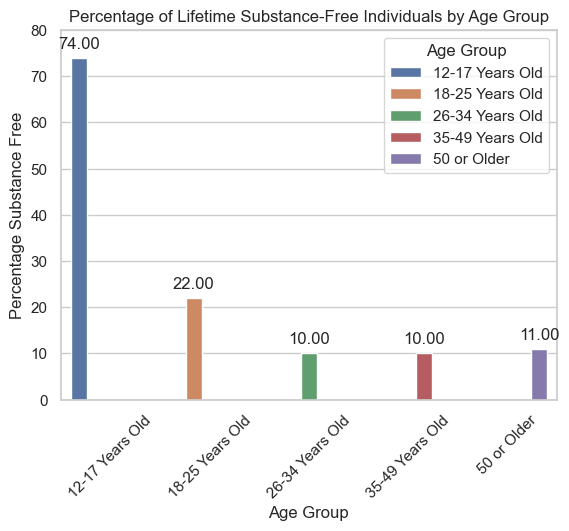

In [90]:
# Use seaborn to plot these results as a bar plot

barplot = sns.barplot(x='age_group', y='percentage', data=sub_free_percent_df, hue='age_group')

# Set the y-axis range to 0-80
barplot.set_ylim(0, 80)

# Rotatate the x-axis labels to 90 degrees
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

# Set x-axis label to capitalized 'Substance'
barplot.set_xlabel('Age Group')

# Set y-axis label to capitalized 'Percentage'
barplot.set_ylabel('Percentage Substance Free')

# Set the legend title to be capitalized 'Age Group'
barplot.legend(title='Age Group')

# Annotate the values on each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
# Set title and font size
plt.title('Percentage of Lifetime Substance-Free Individuals by Age Group', fontsize=12)

In [91]:
# Filter the df such that all flag_cols values are 0
no_alchohol = df[df['ALCFLAG'] == 0]

# We care about age categories (CATAG3)

# Group no_alcohol by age categories
no_alcohol_age_gb = no_alchohol.groupby('CATAG3')['HEALTH2'].count()

# Group df by age categories
df_age_gb = df.groupby('CATAG3')['HEALTH2'].count()

# Inspect
no_alcohol_age_gb

CATAG3
1    7984
2    3261
3    1090
4    1468
5    1495
Name: HEALTH2, dtype: int64

In [92]:
df_age_gb

CATAG3
1    10241
2    12654
3     8845
4    11678
5    10478
Name: HEALTH2, dtype: int64

In [93]:
no_alcohol_age_gb/df_age_gb

CATAG3
1    0.779611
2    0.257705
3    0.123233
4    0.125706
5    0.142680
Name: HEALTH2, dtype: float64

In [94]:
# CATAG3 GB
df_age_gb = df.groupby('CATAG3', as_index=False).count()['HEALTH2']

# Inspect
df_age_gb

0    10241
1    12654
2     8845
3    11678
4    10478
Name: HEALTH2, dtype: int64

## Discover every possible combination of substance use history using flag_cols

### flag_cols represent the Yes/No (0/1) variable denoting whether an inidividual has ever used a particular substance

### We want to know all the possible combinations of substances that an individual has used (including the ones they haven't used)

### We will create a new column for each combination of substances, and the value of the column will be 1 if the individual has used that combination of substances, and 0 otherwise

### The original columns are: 'TOBFLAG', 'MRJFLAG', 'ALCFLAG', 'COCFLAG', 'CRKFLAG', 'HERFLAG', 'LSDFLAG', 'METHAMFLAG'

In [95]:
# Import intertools
import itertools

df = flag_df.copy()

# Define all possible combinations of substances
substances = ['TOBFLAG', 'MRJFLAG', 'ALCFLAG', 'COCFLAG', 'CRKFLAG', 'HERFLAG', 'LSDFLAG', 'METHAMFLAG']
all_combinations = []

# Generate all combinations of different lengths
for r in range(1, len(substances) + 1):
    all_combinations.extend(list(itertools.combinations(substances, r)))

# Create new columns for each combination and set their values
for combination in all_combinations:
    combination_name = '_'.join(combination)
    df[combination_name] = df[list(combination)].all(axis=1).astype(int)

# Display the resulting DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53896 entries, 0 to 53895
Columns: 255 entries, TOBFLAG to TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG
dtypes: int32(255)
memory usage: 52.4 MB


In [96]:
# Inspect dataframe
df

,TOBFLAG,MRJFLAG,ALCFLAG,COCFLAG,CRKFLAG,HERFLAG,LSDFLAG,METHAMFLAG,TOBFLAG_MRJFLAG,TOBFLAG_ALCFLAG,...,ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG
0,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53892,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53893,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
53894,1,1,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# We're interested in discovering which substance combination represent a considerable proportion of the sample population (> 5%)

# To do this, we need the sum for each column (substance combination) and then sort the values in descending order

# We'll also need to remove the columns that are not substance combinations (i.e. only one substance)

# Exclude the first 8 columns from combos
combos = df.iloc[:, 8:]

# Inspect
combos.head()

,TOBFLAG_MRJFLAG,TOBFLAG_ALCFLAG,TOBFLAG_COCFLAG,TOBFLAG_CRKFLAG,TOBFLAG_HERFLAG,TOBFLAG_LSDFLAG,TOBFLAG_METHAMFLAG,MRJFLAG_ALCFLAG,MRJFLAG_COCFLAG,MRJFLAG_CRKFLAG,...,ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG,TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_CRKFLAG_HERFLAG_LSDFLAG_METHAMFLAG
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Create empty dictionary for flag sums
combo_sums = {}
# Set the minimum number of observations to qualify an addition to the dictionary to be 5% of len(combos)
min_num = int(len(combos) * .05)
# Loop through flag_cols over dataframe
for col in combos.columns:
    # If the sum of the column is at least min_num
    if combos[col].sum() >= min_num:
        # Create a new column for each flag column
        combo_sums[col] = combos[col].sum()
# Print the dictionary
combo_sums

{'TOBFLAG_MRJFLAG': 18641,
 'TOBFLAG_ALCFLAG': 24866,
 'TOBFLAG_COCFLAG': 5885,
 'TOBFLAG_LSDFLAG': 4630,
 'MRJFLAG_ALCFLAG': 22589,
 'MRJFLAG_COCFLAG': 6088,
 'MRJFLAG_LSDFLAG': 4878,
 'ALCFLAG_COCFLAG': 6167,
 'ALCFLAG_LSDFLAG': 4914,
 'COCFLAG_LSDFLAG': 3243,
 'TOBFLAG_MRJFLAG_ALCFLAG': 18324,
 'TOBFLAG_MRJFLAG_COCFLAG': 5787,
 'TOBFLAG_MRJFLAG_LSDFLAG': 4581,
 'TOBFLAG_ALCFLAG_COCFLAG': 5849,
 'TOBFLAG_ALCFLAG_LSDFLAG': 4595,
 'TOBFLAG_COCFLAG_LSDFLAG': 3129,
 'MRJFLAG_ALCFLAG_COCFLAG': 6056,
 'MRJFLAG_ALCFLAG_LSDFLAG': 4844,
 'MRJFLAG_COCFLAG_LSDFLAG': 3226,
 'ALCFLAG_COCFLAG_LSDFLAG': 3231,
 'TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG': 5760,
 'TOBFLAG_MRJFLAG_ALCFLAG_LSDFLAG': 4556,
 'TOBFLAG_MRJFLAG_COCFLAG_LSDFLAG': 3116,
 'TOBFLAG_ALCFLAG_COCFLAG_LSDFLAG': 3120,
 'MRJFLAG_ALCFLAG_COCFLAG_LSDFLAG': 3218,
 'TOBFLAG_MRJFLAG_ALCFLAG_COCFLAG_LSDFLAG': 3110}

In [99]:
# Turn combo_sums dictionary into a dataframe
combo_sums_df = pd.DataFrame.from_dict(combo_sums, orient='index')
combo_sums_df.reset_index(inplace=True)

# Rename columns substance_combination and sum
combo_sums_df.rename(columns={'index':'substance_combination', 0:'sum'}, inplace=True)

# Sort in descending order
combo_sums_df.sort_values(by='sum', ascending=False, inplace=True)

# Inspect
combo_sums_df

,substance_combination,sum
1,TOBFLAG_ALCFLAG,24866
4,MRJFLAG_ALCFLAG,22589
0,TOBFLAG_MRJFLAG,18641
10,TOBFLAG_MRJFLAG_ALCFLAG,18324
7,ALCFLAG_COCFLAG,6167
5,MRJFLAG_COCFLAG,6088
16,MRJFLAG_ALCFLAG_COCFLAG,6056
2,TOBFLAG_COCFLAG,5885
13,TOBFLAG_ALCFLAG_COCFLAG,5849
11,TOBFLAG_MRJFLAG_COCFLAG,5787


In [100]:
# Add a calculated variable ('percentage') to show the percentage of the total sample population that falls into each group (note: an individual can fall into multiple groups)

N = len(df)

combo_sums_df['percentage'] = round(combo_sums_df['sum'] / N, 2)*100

combo_sums_df

,substance_combination,sum,percentage
1,TOBFLAG_ALCFLAG,24866,46.0
4,MRJFLAG_ALCFLAG,22589,42.0
0,TOBFLAG_MRJFLAG,18641,35.0
10,TOBFLAG_MRJFLAG_ALCFLAG,18324,34.0
7,ALCFLAG_COCFLAG,6167,11.0
5,MRJFLAG_COCFLAG,6088,11.0
16,MRJFLAG_ALCFLAG_COCFLAG,6056,11.0
2,TOBFLAG_COCFLAG,5885,11.0
13,TOBFLAG_ALCFLAG_COCFLAG,5849,11.0
11,TOBFLAG_MRJFLAG_COCFLAG,5787,11.0


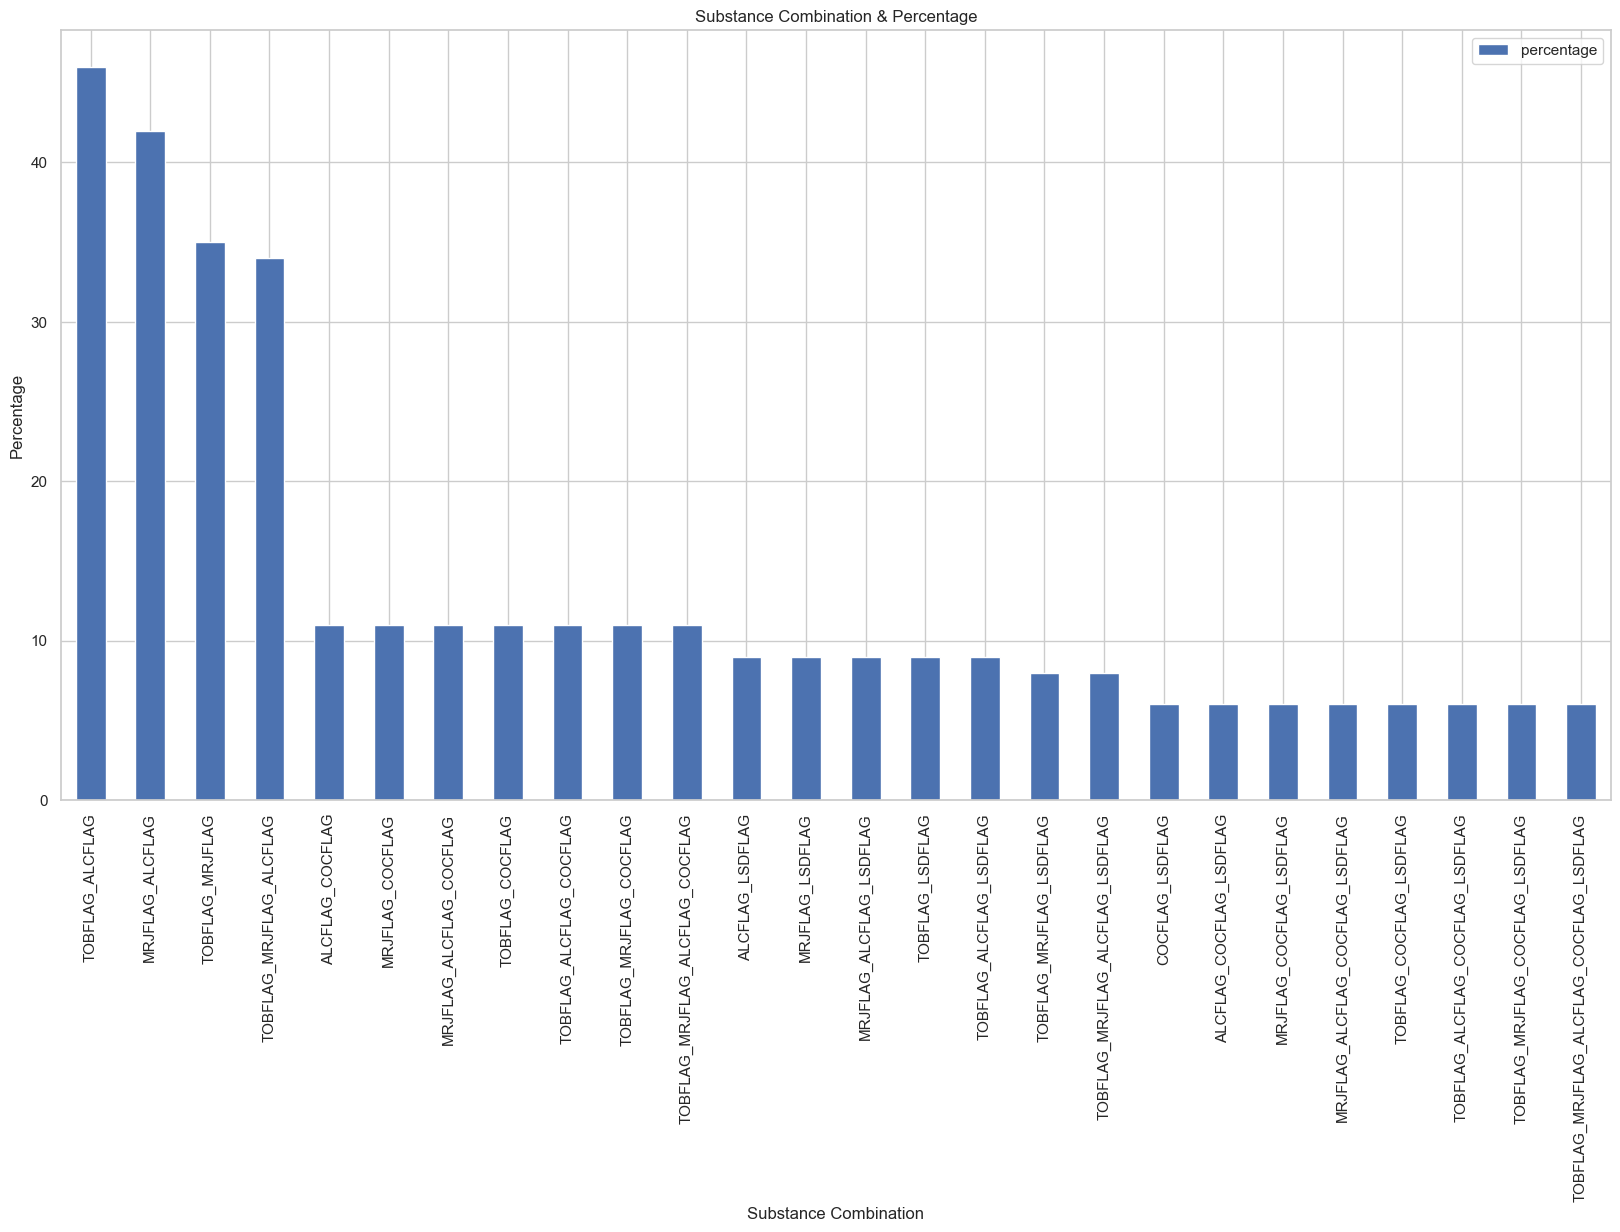

In [101]:
# Visualize substance_combination & percentage from combo_sums_df

combo_sums_df.plot.bar(x='substance_combination', y='percentage', rot=90, figsize=(20,10))

plt.title('Substance Combination & Percentage')

plt.xlabel('Substance Combination')
plt.ylabel('Percentage')
plt.show()

In [102]:
# Calculate the sum of sums in combo_sums_df to understand the proportion of the sample population represented in this group

N_in_combos = combo_sums_df['sum'].sum()

print('The number of individuals in the combos is: ', N_in_combos)

The number of individuals in the combos is:  184403


In [103]:

# Create dataframe with this
df_substance_free_age = pd.DataFrame(substance_free_age_gb/df_age_gb)

# Rename the column 'Percentage Substance Free'
df_substance_free_age.rename(columns={1:'Percentage Substance Free'}, inplace=True)

# Inspect
df_substance_free_age

,HEALTH2
0,0.738795
1,0.220484
2,0.100735
3,0.104042
4,0.112712


In [104]:
# Plot substance_free_age_gb

In [105]:
# Create ADULT dataframe (CATAG3 == 2, 3, or 4)
ADULT = df[df['CATAG3'].isin([2,3,4])]

# Drop the YODSMMDE and DEP columns from ADULT dataframe
ADULT = ADULT.drop(['YODSMMDE', 'DEP'], axis=1)

# Create YOUTH dataframe (CATAG3 == 1)
YOUTH = df[df['CATAG3'].isin([1])]

# Drop the ADSMMDEA and DEP columns from YOUTH dataframe
YOUTH = YOUTH.drop(['ADSMMDEA', 'DEP'], axis=1)

KeyError: 'CATAG3'